In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
def flip_hor_at_u(img, cx, flag_plot=False):
    # determine line for flipping rounded to 0.5 pixel
    cx_rounded = np.round(cx * 2).astype(np.int)
    u_flip = cx_rounded / 2

    # determine new width
    height, width, nchannels = img.shape
    if cx_rounded % 2 == 1:
        # if flipping line lies between two pixels...
        width_left = np.ceil(u_flip)
        width_right = np.floor(width - u_flip)
        width_new = 2 * max(width_left, width_right)
        pad_left = width_new / 2 - width_left
        pad_right = width_new / 2 - width_right
    else:
        # if flipping line lies at a pixel...
        width_left = np.round(u_flip)
        width_right = np.round(width - u_flip - 1)
        width_new = 2 * max(width_left, width_right) + 1
        pad_left = (width_new - 1) / 2 - width_left
        pad_right = (width_new - 1) / 2 - width_right

    # create new image and flip horizontally
    bg = img.mean(1, keepdims=True).astype(img.dtype)
    bg_left = np.repeat(bg, pad_left, axis=1)
    bg_right = np.repeat(bg, pad_right, axis=1)
    img_padded = np.hstack((bg_left, img, bg_right))
    img_padded_flipped = img_padded[:, ::-1, :]

    # crop back to org size s.t. cx=const
    dim_right = width_new-pad_right
    img_cropped = img_padded_flipped[:,
                  pad_left.astype(np.int):dim_right.astype(np.int)
                  :]
    width_cropped = img_cropped.shape[1]
    assert width_cropped== width, "width changed during flipping ?!"

    # plot images
    if flag_plot:
        fig_width, fig_height = max(4,width/100), max(6, 2*height/100)
        fig,ax = plt.subplots(2,1, sharey=True, sharex=True, figsize=(fig_width,fig_height))
        ax[0].imshow(img)
        ax[1].imshow(img_cropped)
        for axi in ax:
            axi.vlines(u_flip, 0, height-1)
        plt.show()

    return img_cropped

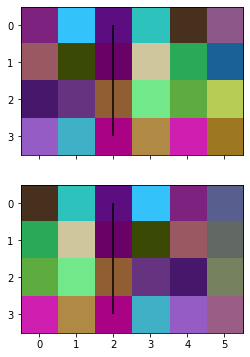

In [ ]:
img = np.random.rand(4, 6, 3) * 255
img = img.astype(np.uint8)
img_flipped = flip_hor_at_u(img, cx=2, flag_plot=True)

In [ ]:
# load the image
from google.colab import files
path_img = files.upload()

Saving bird.jpg to bird.jpg


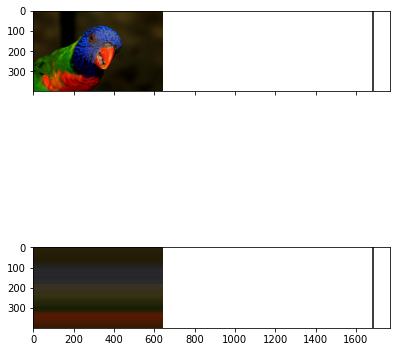

In [ ]:
cam_K = np.array([[2304.5479, 0, 1686.2379],
                  [0, 2305.8757, 1354.9849],
                  [0, 0, 1]], dtype=np.float32)
cx = cam_K[0, 2]
img = cv2.imread('bird.jpg', 1)[:,:,::-1] #BGR to RGB
img_flipped = flip_hor_at_u(img, cx, flag_plot=True)